# Intake Catalogs

> You must be using **Python 3.6** or newer for this feature

Intake is a lightweight package for finding, investigating, loading and disseminating data. It will appeal to different groups for some of the reasons below, but is useful for all and acts as a common platform that everyone can use to smooth the progression of data from developers and providers to users.

- Source: https://github.com/intake/intake
- Docs: https://intake.readthedocs.io/en/latest/catalog.html

In [1]:
from podpac.datalib import IntakeCatalog

## Precip Example

In [2]:
node = IntakeCatalog(uri='../../data/intake/precip/catalog.yml',   # path to catalog
                     source='southern_rockies',  # name of the source within catalog
                     field='precip',         # this can be defined in catalog source metadata
                     dims={'time': 'time'}   # this can be defined in catalog source metadata
                    )

In [3]:
# the node.catalog attribute contains the loaded intake catalog
node.catalog

<Intake catalog: precip>

In [4]:
# the node.datasource attribute contains the loaded intake catalog source
node.datasource

name: southern_rockies
container: dataframe
plugin: ['csv']
description: These data sets are subsets of the Maurer, et al. (2007) bias corrected, spatially downscaled monthly climate predictions. The CSV files here cover three emissions scenarios b1 (low emissions and rate of change), a1b (middle) and a2 (high). Emission scenarios are possibilities for how the future will unfold in terms of greenhouse gas emissions, land use and other environmental factors.
direct_access: forbid
user_parameters: []
metadata: 
  origin: https://www.sciencebase.gov/catalog/item/511e740de4b071e86a19a524
  fields: 
    precip: 
      label: Precipitation
      unit: mean mm/day
  plot: 
    x: time
    y: precip
args: 
  urlpath: {{ CATALOG_DIR }}/data/SRLCC_{emissions}_Precip_{model}.csv
  csv_kwargs: 
    skiprows: 3
    names: ['time', 'precip']
    parse_dates: ['time']

In [5]:
# the `dims` input defines where to find the data and dimension labels for native coordinates
node.coordinates

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Coordinates (EPSG:4326)
	time: ArrayCoordinates1d(time): Bounds[1950-01-16T00:00:00.000000000, 2099-12-15T00:00:00.000000000], N[16200]

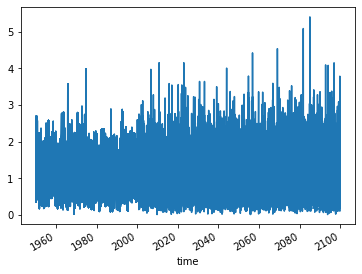

In [6]:
# one the node is defined, it works like any other podpac node
# podpac uses intake to read the data internally
output = node.eval(node.coordinates)
output.plot()
pass